<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 
### <center> Author: Pavel Taiga, ptaiga
    
## <center> Telco Customer Churn Prediction

Dataset: https://www.kaggle.com/blastchar/telco-customer-churn

The individual project was сompleted during the fall2018-session on December 16, 2018

__Content__:
+ 1 Feature and data explanation
+ 2 Basic data analysis
    - 2.1 Data loading and inspection
    - 2.2 Data preprocessing
    - 2.3 Initial data analysis
    - 2.4 New features
+ 3 Visual data analysis
+ 4 Cross-validation and adjustment of model hyperparameters
+ 5 Conclusions

### 1 Feature and data explanation

The raw data contains 7043 rows (customers) and 21 columns (features). Each row represents a customer, each column contains customer’s attributes.

**The “Churn” column is our target.**

_Columns_:

 - **customerID**: Customer ID
 - **gender**: Customer gender (female, male)
 - **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
 - **Partner**: Whether the customer has a partner or not (Yes, No)
 - **Dependents**: Whether the customer has dependents or not (Yes, No)
 - **tenure**: Number of months the customer has stayed with the company
 - **PhoneService**: Whether the customer has a phone service or not (Yes, No)
 - **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
 - **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)
 - **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
 - **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
 - **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
 - **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
 - **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
 - **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
 - **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
 - **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
 - **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
 - **MonthlyCharges**: The amount charged to the customer monthly
 - **TotalCharges**: The total amount charged to the customer
 - **Churn**: Whether the customer churned or not (Yes or No)

We will solve a typical customer churn prediction problem. When the market is "saturated" and it is difficult to find new customers (аs in the case of telecommunications companies), the important task of the company is to retain existing customers, that is, to minimize churn.

To begin with, we will inspect the data, then convert them into the format necessary for further use. Next, we will try to train several models and conduct a visual analysis.

### 2 Basic data analysis

Let's start by loading, inspecting and preprocessing the data (https://www.kaggle.com/blastchar/telco-customer-churn). And also perform a basic analysis.

#### 2.1 Data loading and inspection 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('telco-customer-churn.zip')
data.shape

(7043, 21)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

So we see that most of our data is non-numeric. Let's try to find out whether this is true, and perform type conversion if necessary.

#### 2.2 Data preprocessing

Select and convert binary features, as well as the target column "Churn".

In [4]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

In [5]:
for col in yes_no_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

In [6]:
data['Male'] = data['gender'].map({'Male': 1, 'Female': 0})
data.drop('gender', axis=1, inplace=True)

The column "TotalCharges" in addition to numerical values contains a string containing a space. This check can be done for example with the following code:
<code>
try:
    for val in data['TotalCharges']:
        float(val)
except ValueError:
    print(f"'{val}'")
</code>

Perform the processing and replace the spaces with zeros. After that, we convert this attribute into a numeric format.

In [7]:
print('Row indexes to be replaced:')
for i in range(len(data['TotalCharges'])):
    if data.loc[i, 'TotalCharges'] == ' ':
        data.loc[i, 'TotalCharges'] = 0
        print(i, end=', ')
data['TotalCharges'] = data['TotalCharges'].astype('float')

Row indexes to be replaced:
488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754, 

Now let's see what features are of type 'object'.

In [8]:
def object_features(data, drop=[]):
    '''Selects columns of type 'object' in the data and deletes the specified in the drop list.'''
    obj_cols = []
    for col in data:
        if data[col].dtype == 'object':
            obj_cols.append(col)
    for col in drop:
        obj_cols.remove(col)
    return obj_cols

print(object_features(data))

['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


And what values does each of these features, except for the _'customerID'_ column, which has no special application for this task, since it is only an identifier.

In [9]:
for col in object_features(data, drop=['customerID']):
    print(col, ':', data[col].unique())

MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


It is not difficult to notice that some featuress have an intersection. For example, those customers who do not have _'PhoneService'_ have _'No phone services'_ in the _'MuptipleLines'_ column.

In [10]:
sum(pd.get_dummies(data['MultipleLines'], prefix='MultipleLines')['MultipleLines_No phone service'] 
    - data['PhoneService'].map({1:0, 0:1}))

0

Thus, from the feature _'MultipleLines'_ we used dummy (one-hot) encoding making two new columns and delete the third responsible for the existence of 'PhoneServices'.

In [11]:
data = pd.concat([data, pd.get_dummies(data['MultipleLines'], prefix='MultipleLines')
                    .drop('MultipleLines_No phone service', axis=1)], axis=1) \
    .drop('MultipleLines', axis=1)

Now let's work with the features associated with the presence/absence of the Internet from the customers. Start with the 'InternetServices' column and convert it to three using dummy encoding.

In [12]:
i_s = pd.get_dummies(data['InternetService'])
data['DSL'] = i_s['DSL']
data['FiberOptic'] = i_s['Fiber optic']
data['InternetService'] = i_s['No'].map({1:0, 0:1})
data.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,MultipleLines_No,MultipleLines_Yes,DSL,FiberOptic
0,7590-VHVEG,0,1,0,1,0,1,No,Yes,No,...,1,Electronic check,29.85,29.85,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,1,Yes,No,Yes,...,0,Mailed check,56.95,1889.50,0,1,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,Yes,Yes,No,...,1,Mailed check,53.85,108.15,1,1,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,1,Yes,No,Yes,...,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,1,0
4,9237-HQITU,0,0,0,2,1,1,No,No,No,...,1,Electronic check,70.70,151.65,1,0,1,0,0,1


Take the features associated with Internet services.

In [13]:
i_s_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

Perform dummy encoding for these features. And by analogy with the telephone services will remove the value _'No internet service'_, so this information is already contained in the column _'InternetService'_, if we perform the inversion.

In [14]:
for col in i_s_cols:
    dum = pd.get_dummies(data[col], prefix=col)
    diff = dum[col+'_No internet service'] \
            - data['InternetService'].map({0:1, 1:0})
    if diff.isnull().sum():
        print(col, 'contains NaN values!')
    else:
        print(col + ":", diff.sum())
        data = pd.concat([data.drop(col, axis=1), dum.drop(col+'_No internet service', axis=1)], 
                         axis=1)

OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0


And at the end of data preprocessing we will perform the transformation of the remaining two categorical features.

In the case of _'Contract'_, you can try a method where the _'Month-to-month'_ is coded at _0_, _'One year'_ at _1_, and _'Two years'_ at _2_, as well as dummy encoding. But since the first method showed the worst quality, so let's focus on the second method.

In [15]:
# data['Contract'] = data['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2}) \
#                     .astype(np.uint8)

contract = pd.get_dummies(data['Contract'])
for i, col in enumerate(contract):
    data['Contract_'+str(i)] = contract[col]
data.drop('Contract', axis=1, inplace=True)

Perform a similar operation for the _'PaymentMethod'_.

In [16]:
pm = pd.get_dummies(data['PaymentMethod'])
for i, col in enumerate(pm):
    data['PM_'+str(i+1)] = pm[col]
data.drop('PaymentMethod', axis=1, inplace=True)

Now we have all of the features numerical. And we can do basic data analysis.

#### 2.3 Initial data analysis

Necessary libraries for further work.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings

Separate the feature matrix and the target variable.

In [18]:
y = data['Churn']
X = data.drop(['Churn'] + object_features(data), axis=1)
y.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In this task, there is a small imbalance of classes of the target variable: the fraction of churn (class "1") is less than its absence (class "0"). Therefore, it is important for us not to miss the presence of a possible churn. If some client is not going to leave, but we predict the churn, then there is nothing wrong. But we must not lose a client who is about to leave. Therefore, our metric should be able to account for True Negative errors. Therefore, it is advisable to choose the __ROC AUC__ metric for this task.

Also, the advantage of this metric is that we operate on the probabilities of predictions, which allows us to determine how confident the algorithm is in a particular answer.

In [19]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Male,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_0,Contract_1,Contract_2,PM_1,PM_2,PM_3,PM_4
0,0,1,0,1,0,1,1,29.85,29.85,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,1,0,56.95,1889.50,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,1,53.85,108.15,1,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,45,0,1,0,42.30,1840.75,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,1,70.70,151.65,0,...,0,1,0,1,0,0,0,0,1,0


Since there are only 33 features in our dataset, it is possible that a Random Forest or even a Decision Tree will cope well with it. But at the same time, we will certainly try to apply Logistic Regression as well.

Separate our data into the main and test sets in the ratio 70/30.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

First, let's check the quality (ROC AUC) of the _DecisionTreeClassifier_, _RandomForestClassifier_ and _LogisticRegression_ on our data without setting the models parameters (out of the box).

In [21]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
print(roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))

0.664642070397312


In [22]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
forest_score = roc_auc_score(y_test, forest.predict_proba(X_test)[:,1])
print(forest_score)

0.8334612502348917


In [23]:
logit = LogisticRegression(random_state=42, solver='liblinear')
logit.fit(X_train, y_train)
logit_score = roc_auc_score(y_test, logit.predict_proba(X_test)[:,1])
print(logit_score)

0.8579726189910185


Before logistic regression training, it is good practice to normalize features, for example, using StandardScaler. If we do this, we will see that the quality of the model predictions increased slightly.

In [24]:
warnings.filterwarnings('ignore')
logit_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logit', LogisticRegression(random_state=42, solver='liblinear'))
])
logit_pipe.fit(X_train, y_train)
print(roc_auc_score(y_test, logit_pipe.predict_proba(X_test)[:,1]))
warnings.filterwarnings('default')

0.8588533211982079


In [25]:
models_scores = pd.DataFrame([logit_score, forest_score], 
                             columns=['out-of-box'], index=['logit', 'forest'])

#### 2.4 New features

In this section, we will create new features.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

First, try to create a binary attribute *long_term_client*, which will be equal to _1_ if the client has a contract for one or two years.

In [27]:
long_term_client = (data['Contract_0'] != 1).astype(np.uint8)

It is possible that there are some non-linear dependencies in our data. Сreate polynomial features based on the existing ones with the help of _PolynomialFeatures_. 

In [28]:
poly = PolynomialFeatures()
poly_feat = poly.fit_transform(X)
X_poly = np.hstack([X.values, poly_feat])
X_poly.shape

(7043, 628)

If we add these features to the existing ones and check the quality of the models, we will notice a deterioration in quality of models, especially in the case of logistic regression. Therefore, we will not leave them and will continue to work without them, since it makes no sense to add 628 new features that do not particularly affect the result.

In [29]:
pd.concat([models_scores, pd.Series([0.8192703982177666, 0.83254715379234], 
                                    name='poly', index=['logit', 'forest'])], axis=1)

,out-of-box,poly
logit,0.857973,0.819270
forest,0.833461,0.832547


### 3. Visual data analysis

Import libraries needed for visual analysis.

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

We will add features one by one and see how the quality metric changes.

The features that reduce the quality metric of 'forest':
['PhoneService', 'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingMovies_Yes', 'Contract_2', 'PM_1']

The features that reduce the quality metric of 'logit':
['PhoneService', 'Male', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'Contract_1', 'PM_4']


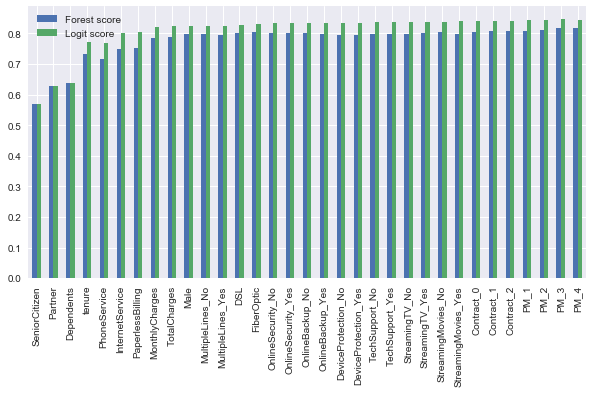

In [32]:
def features_score(model, X, y, seed=42, test_size=0.3):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)
    features, scores, drop = [], [], []
    for feat in X:
        features.append(feat)
        model.fit(X_train[features], y_train)
        scores.append(roc_auc_score(y_test, model.predict_proba(X_test[features])[:,1]))
        if len(scores) > 1 and scores[-1] < scores[-2]:
            drop.append(feat)
            # print(features[-2:], scores[-2:])
    print(drop)
    return pd.Series(scores, index=features)

print('The features that reduce the quality metric of \'forest\':')
s1 = features_score(forest, X, y) 
print('\nThe features that reduce the quality metric of \'logit\':')
s2 = features_score(logit, X, y)
pd.DataFrame([s1, s2], index=['Forest score', 'Logit score']).T \
    .plot(kind='bar', rot=90, figsize=(10,5));

We see that when we add (one by one) features, the quality increases with small fluctuations. 

If we remove the features that reduce the quality in such an experiment, the quality of LogisticRegrassion will slightly improve, but the quality of RandomForest will fall. Thus, it makes sense to leave all the indicative space.

Now look at the importance of each of the features according to the random forest. Show the top-5 most important and build a plot.

TotalCharges         0.163567
tenure               0.148924
MonthlyCharges       0.146086
Contract_0           0.061566
OnlineSecurity_No    0.032553
Name: Feature importances, dtype: float64

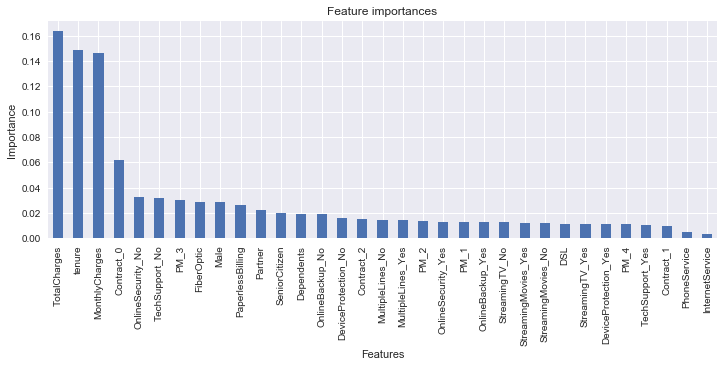

In [33]:
feat_imp = pd.Series(forest.feature_importances_, index=X.columns, name='Feature importances') \
                .sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(12,4), title='Feature importances')
plt.xlabel('Features'), plt.ylabel('Importance');
feat_imp.head()

Plot the distribution of the most important features.

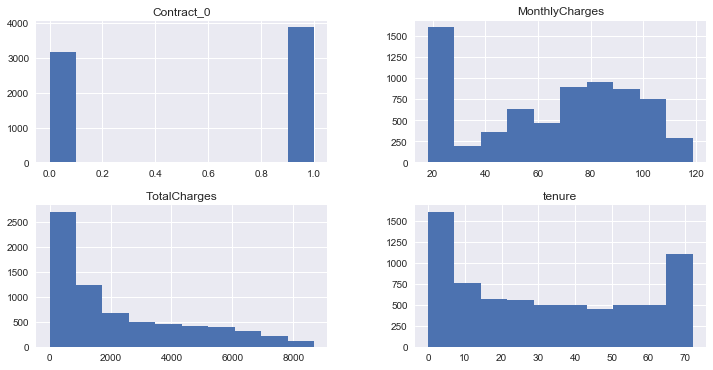

In [34]:
data[feat_imp.index[:4]].hist(figsize=(12,6));

Also look at the pairwise correlation of features and include the _Churn_ as well.

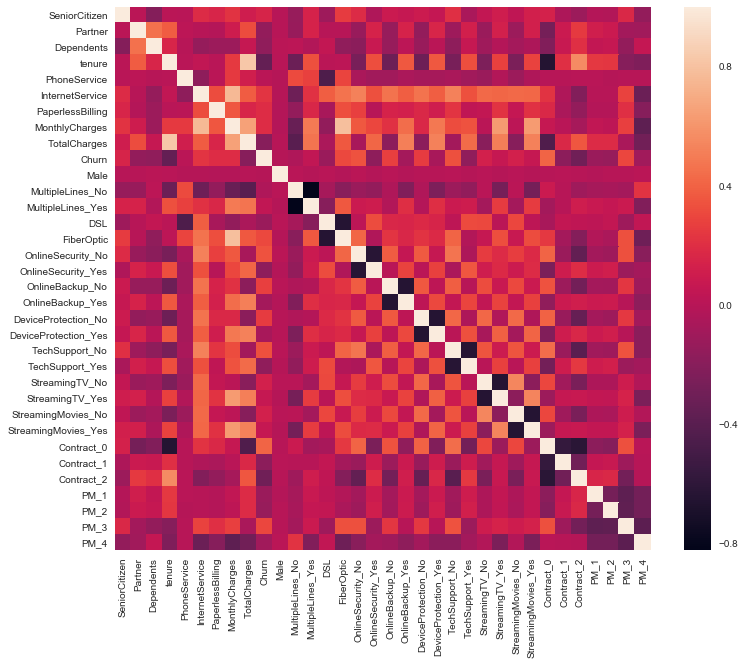

In [35]:
_, axes = plt.subplots(figsize=(12, 10))
sns.heatmap(data.corr(), ax=axes);

The heatmap shows that there are no features that strongly correlate with each other except _'TotalCharges'_ to _'MonthlyCharges'_ and _'TotalCharges'_ to _'tenure'_. But these features are very significant from the point of view of a random forest. Let's look at their distribution relative to each other.

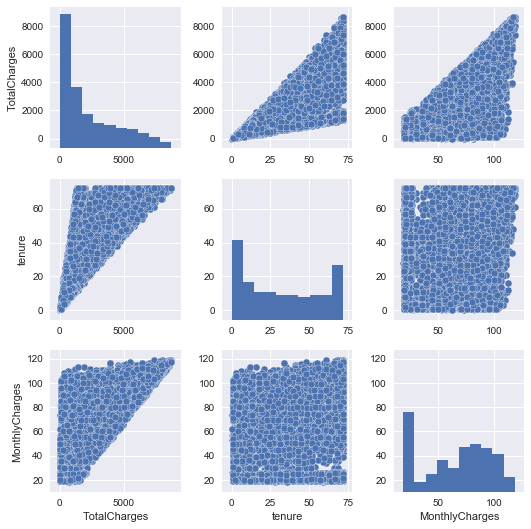

In [36]:
sns.pairplot(data[feat_imp.index[:3]]);

Build the distribution _'MonthlyCharges'_ and _'tenure'_ relative to _'TotalyCharges'_ and highlight the churn using orange color.

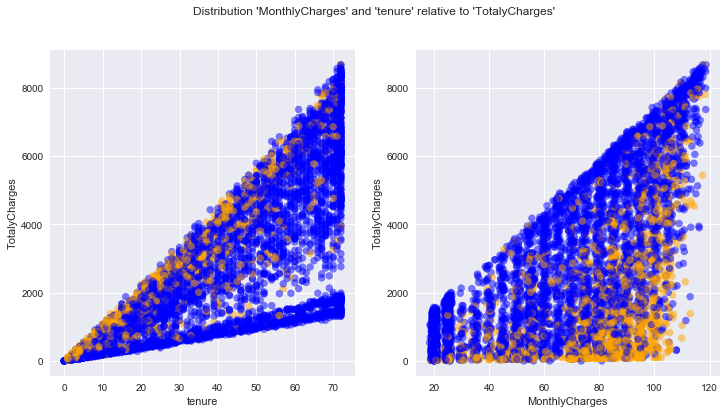

In [37]:
_, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)
plt.suptitle('Distribution \'MonthlyCharges\' and \'tenure\' relative to \'TotalyCharges\'')
axes[0].scatter(data['tenure'], data['TotalCharges'], c=y.map({1:'orange', 0:'blue'}), alpha=0.5)
axes[0].set_xlabel('tenure'), axes[0].set_ylabel('TotalyCharges')
axes[1].scatter(data['MonthlyCharges'], data['TotalCharges'], c=y.map({1:'orange', 0:'blue'}), alpha=0.5)
axes[1].set_xlabel('MonthlyCharges'), axes[1].set_ylabel('TotalyCharges');

According to these two graphs, there are two types of clients that are prone to churn.

On the left graph we see that customers who are prone to churn tend to have a high level of _'TotalCharges'_ steadily increasing over time. Apparently it is loyal customers who suddenly something was not satisfied.

On the right graph, we see that churn-prone customers have high monthly charges with low total charges. Most likely these are those clients who came just to try.

Therefore, it is logical to assume that the model comparing these three features with each other can assume the probability of churn. And that's why these features are so important according to random forest.

### 4 Cross-validation and adjustment of model hyperparameters

Let's start by importing the libraries we need.

In [38]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

Create cross-validation object that returns stratified folds: the folds are made by preserving the percentage of samples for each class. Since we have little data, we will make a split into 3 folds. And also we will shuffle the original sample, since there is no reference to the time stamps.

In [39]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

For logistic regression, we will configure the _'C'_: 
    - this parameter is the inverse of regularization strength; 
    - must be a positive float;
    - like in support vector machines, smaller values specify stronger
    regularization;

In [40]:
%%time
gs_logit = GridSearchCV(logit, param_grid={'C': np.logspace(-3, 0, 20)}, 
                        cv=skf, scoring='roc_auc', return_train_score=True)
gs_logit.fit(X_train, y_train)

Wall time: 2.19 s


Best parameter: {'C': 0.1623776739188721}
Best cv-score: 0.8364832855111084
Score for test set: 0.8580133712782407


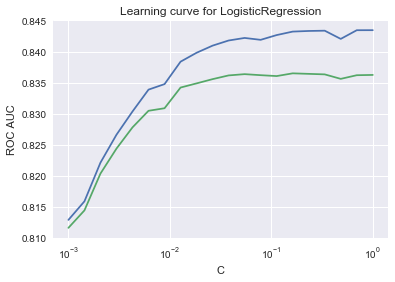

In [41]:
plt.plot(np.logspace(-3, 0, 20), gs_logit.cv_results_['mean_train_score'])
plt.plot(np.logspace(-3, 0, 20), gs_logit.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.title('Learning curve for LogisticRegression')
print('Best parameter:', gs_logit.best_params_) 
print('Best cv-score:', gs_logit.best_score_)
logit_score = roc_auc_score(y_test, gs_logit.best_estimator_.predict_proba(X_test)[:,1])
print('Score for test set:', logit_score)
models_scores['cv'] = pd.Series(name='cv', index=['logit', 'forest'])
models_scores['test'] = pd.Series(name='test', index=['logit', 'forest'])
models_scores['cv']['logit'] = gs_logit.best_score_
models_scores['test']['logit'] = logit_score

To simplify the search for optimal parameters and plot learning curves, we write a function.

In [42]:
def learning_and_plot(model, params, axes, cv=3):
    '''Training 'model' consistently with 'params' and plot learning curves in a given 'axes' '''
    best_params = {}
    i = 0
    for param in param_grid:
        p = best_params
        p[param] = param_grid[param]
        gs = GridSearchCV(model, p, cv=cv, scoring='roc_auc', return_train_score=True)
        gs.fit(X_train, y_train)
        for best in gs.best_params_:
            best_params[best] = [gs.best_params_[best]]

        axes[i].plot(param_grid[param], gs.cv_results_['mean_train_score'])
        axes[i].plot(param_grid[param], gs.cv_results_['mean_test_score'])
        axes[i].set_xlabel(param), axes[i].set_ylabel('ROC AUC') 
        i += 1
    print('Best parameters:', gs.best_params_) 
    print('Best cv-score:', gs.best_score_)
    return gs.best_estimator_, gs.best_score_

And try this function first on a _RandomForestClassifier_. 

We will configure two parameters *'n_estimators'* and *'max_depth'*:

   - *'n_estimators'* - the number of trees in the forest;
   - *'max_depth'*  - the maximum depth of the tree.

Best parameters: {'max_depth': 7, 'n_estimators': 200}
Best cv-score: 0.8412912579981137
Score for test set: 0.8582754311252386


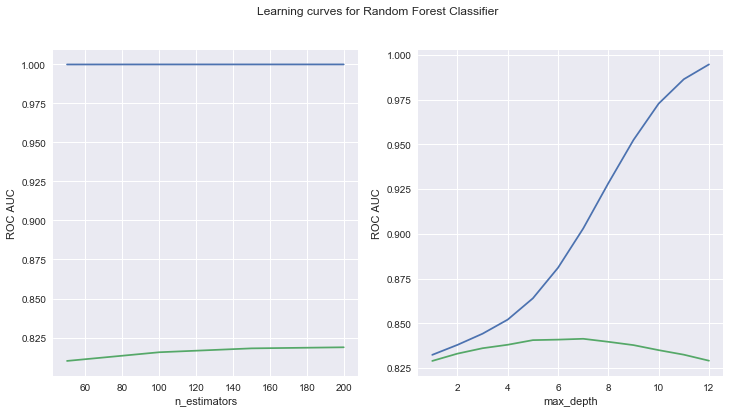

In [43]:
forest = RandomForestClassifier(random_state=42)

_, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)
plt.suptitle('Learning curves for Random Forest Classifier')

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12],
}

best_model, cv_score = learning_and_plot(forest, param_grid, axes, skf)
forest_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
print('Score for test set:', forest_score)
models_scores['cv']['forest'] = cv_score
models_scores['test']['forest'] = forest_score

And also do the same for the _LGBMClassifier_.

In [45]:
from lightgbm import LGBMClassifier

Let's see the quality of the model without setting parameters.

In [46]:
lgbm = LGBMClassifier(n_estimators=200, max_depth=10, random_state=42)
lgbm.fit(X_train, y_train)
lgbm_score = roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1])
models_scores.loc['lgbm','out-of-box'] = lgbm_score
print(lgbm_score)

0.8380317324476504


We will configure the following parameters:
 - *max_depth* - maximum tree depth for base learners;
 - *learning_rate* - boosting learning rate;
 - *n_estimators* - number of boosted trees to fit.

Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
Best cv-score: 0.8407363968548581
Score for test set: 0.8580699716771603


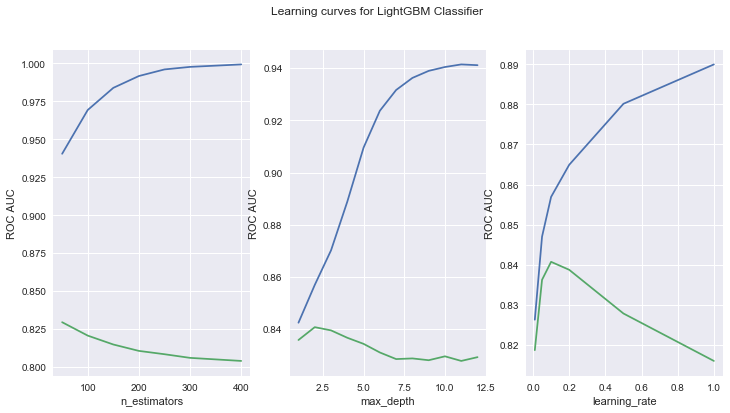

In [47]:
_, axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=3)
plt.suptitle('Learning curves for LightGBM Classifier')

param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 400],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1]
}

best_model, cv_score = learning_and_plot(lgbm, param_grid, axes, skf)
lgbm_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
print('Score for test set:', lgbm_score)
models_scores['cv']['lgbm'] = cv_score
models_scores['test']['lgbm'] = lgbm_score

It can be seen that the results of the models on the test (hold-out) sample do not contradict the results on cross-validation. An interesting finding is that logistic regression works for this task as well as a random forest, and gradient boosting.

In [48]:
models_scores

,out-of-box,cv,test
logit,0.857973,0.836483,0.858013
forest,0.833461,0.841291,0.858275
lgbm,0.838032,0.840736,0.858070


We can also see that gradient boosting is easily retrained on the available data and that the simplest model is enough to give a good quality on the test sample. Most likely this is due to the fact that only a small part of the features works and gives a good prediction. That is not contrary to the visual analysis.

### 5 Conclusions

In this problem, we obtained a sufficiently high quality of prediction using simple models, which indicates the presence of simple dependencies on the target variable.

It seems clear that improving quality requires both more data and additional features to provide more information about users.

It is reasonable to take logistic regression for this task. The training time of random forest significantly more that will be particularly noticeable with increase in volume of the dataset. Gradient boosting is easy retrain on such features, therefore, for the optimal settings of the algorithm needs more data.